In [3]:
!pip install windrose

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes

# Load dataset

df = pd.read_csv('/solar-radiation-analysis/notebooks/benin-malanville.csv')  # Replace with your dataset path

# Display first 5 rows
print(df.head())


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [8]:
# Summary statistics for numeric columns
summary_stats = df.describe()
print(summary_stats)

# Median for each numeric column
medians = df.median(numeric_only=True)
print("Medians:\n", medians)


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [9]:
# Check for missing values
print(df.isnull().sum())


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


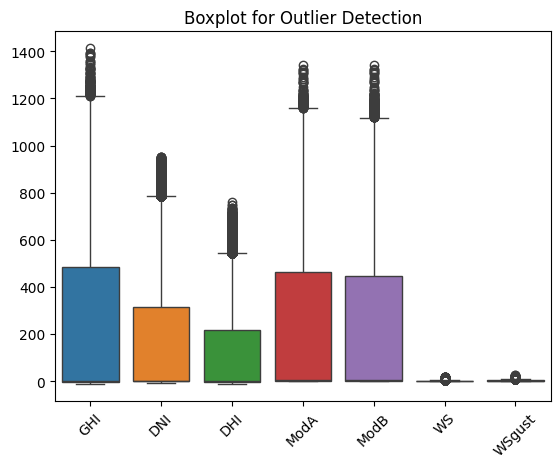

In [10]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
sns.boxplot(data=df[columns_to_check])
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=45)
plt.show()


In [11]:
# Check for negative values in columns where only positive values should exist
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    negatives = df[df[col] < 0]
    print(f"Negative values in {col}:\n{negatives}")


Negative values in GHI:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev

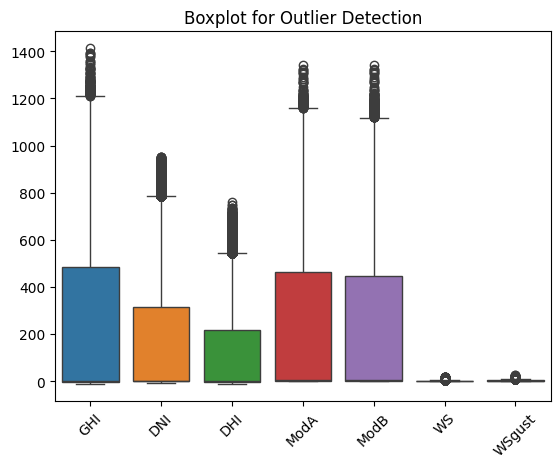

In [12]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
sns.boxplot(data=df[columns_to_check])
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=45)
plt.show()


In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)


<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


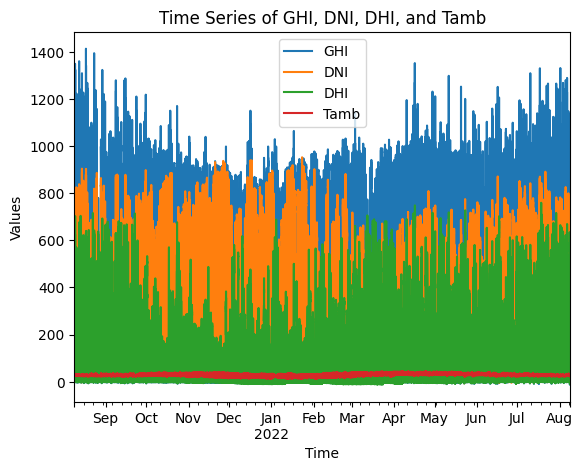

In [14]:
plt.figure(figsize=(12, 6))
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot()
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


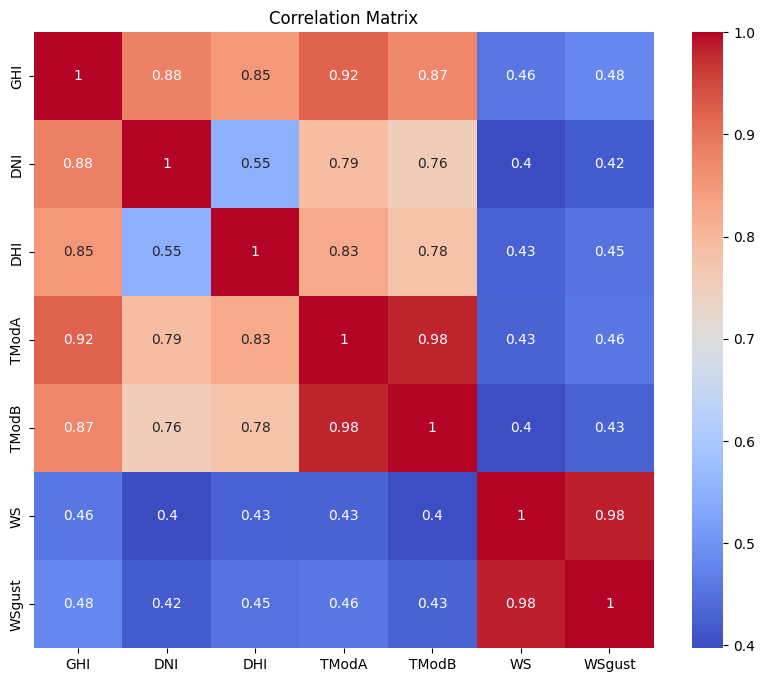

In [15]:
corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


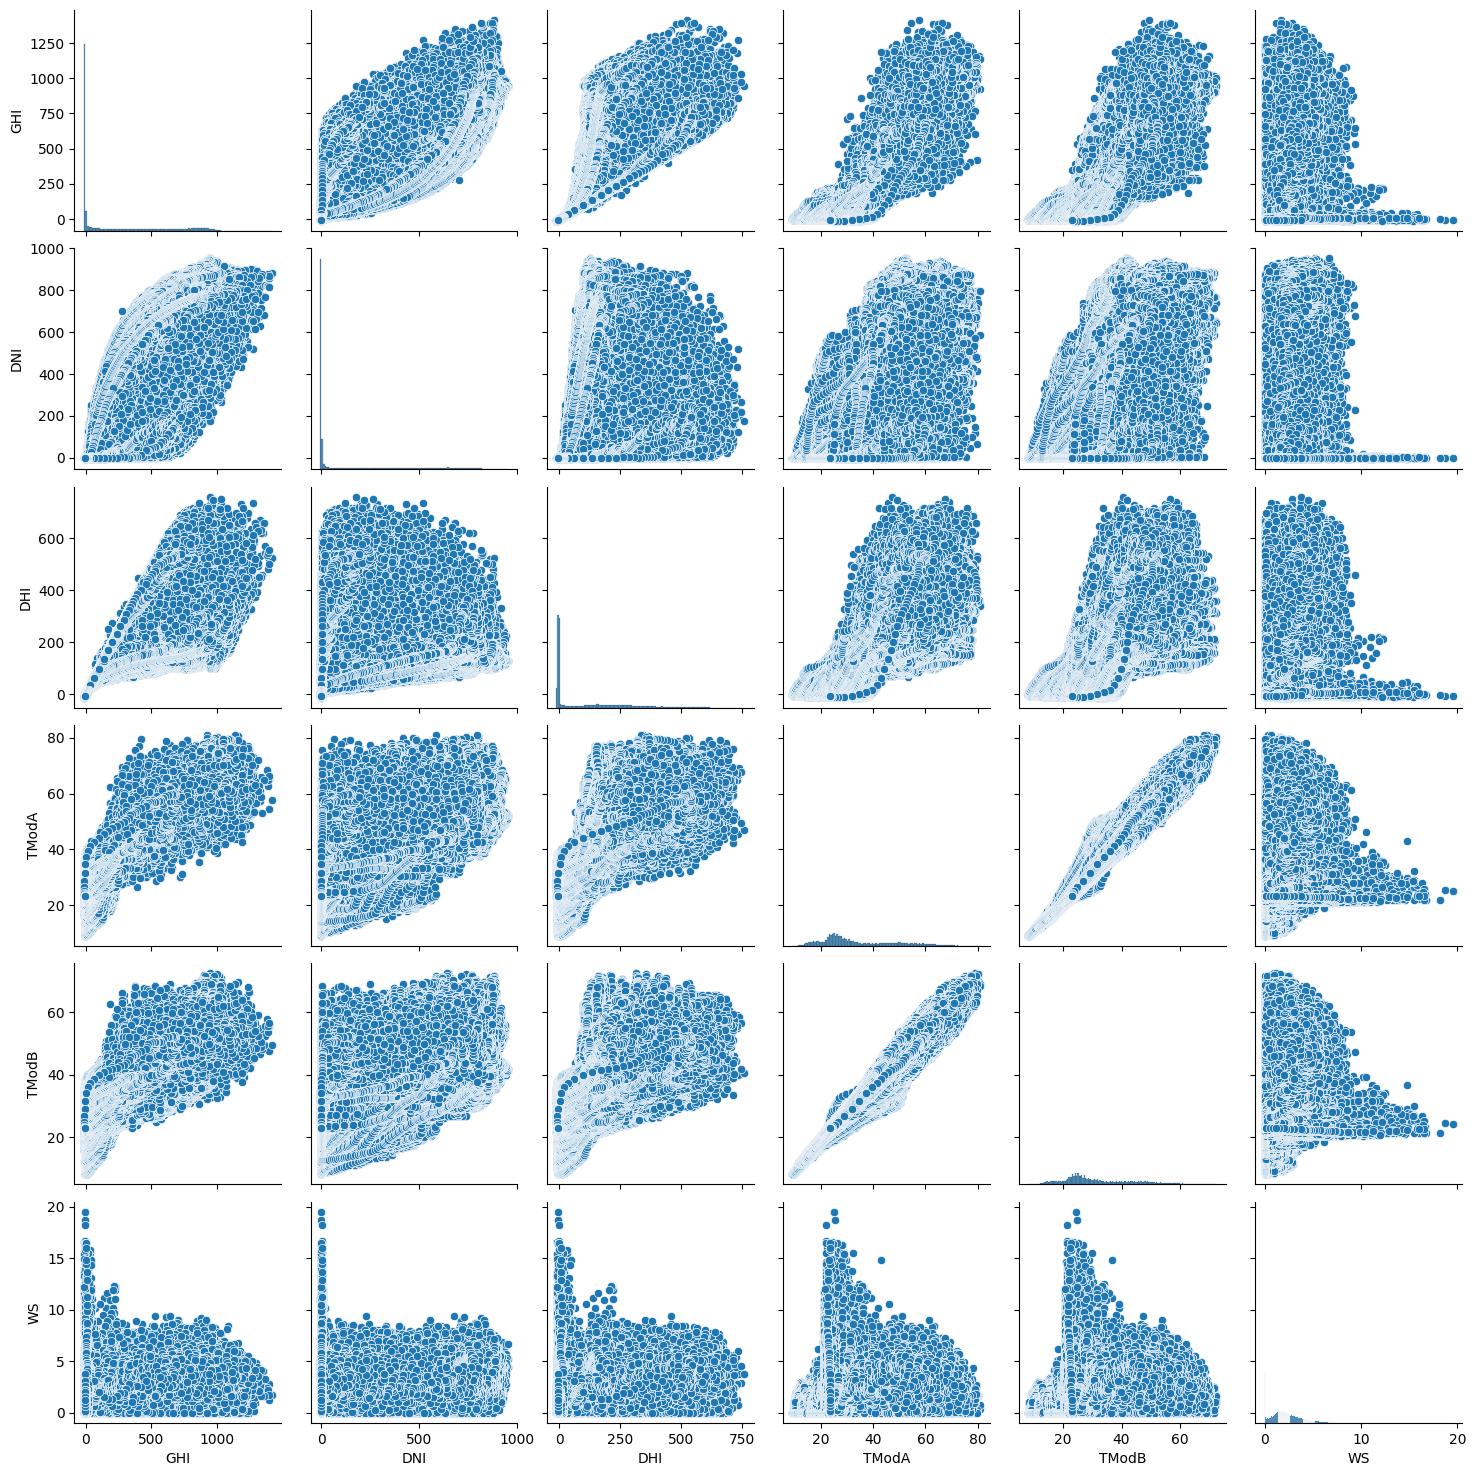

In [16]:
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS']])
plt.show()


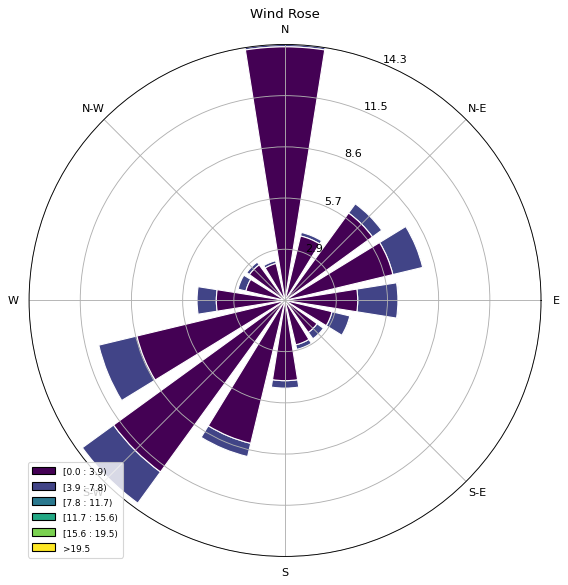

In [17]:
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose')
plt.show()


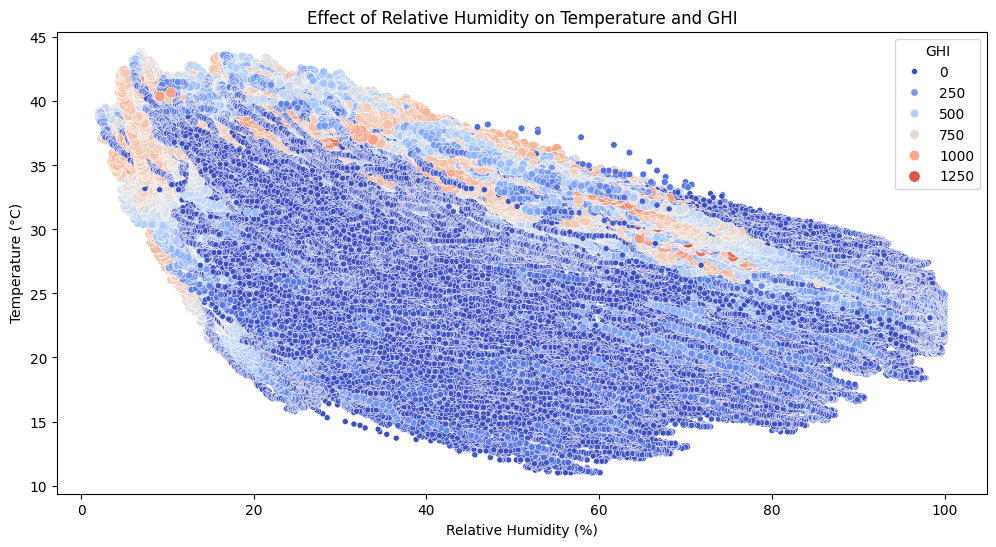

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='RH', y='Tamb', data=df, hue='GHI', size='GHI', palette='coolwarm')
plt.title('Effect of Relative Humidity on Temperature and GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.show()


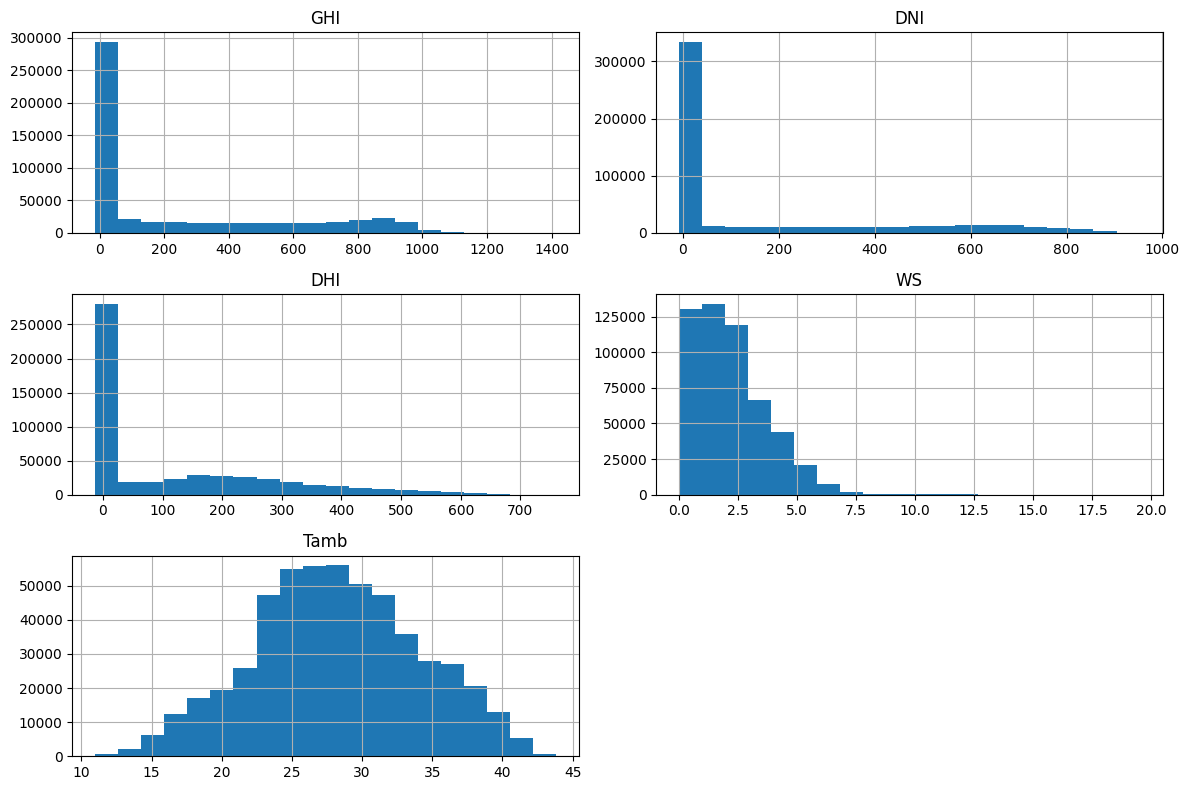

In [19]:
columns_to_plot = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
df[columns_to_plot].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


In [20]:
# Compute Z-scores
df['GHI_zscore'] = zscore(df['GHI'])
outliers = df[np.abs(df['GHI_zscore']) > 3]
print("Outliers based on GHI Z-score:\n", outliers)


Outliers based on GHI Z-score:
                         GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
Timestamp                                                                    
2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6  3.4   
2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1  4.0   
2021-08-09 11:17:00  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0  2.7   
2021-08-09 14:10:00  1253.0  714.8  552.5  1156.0  1155.0  31.0  64.2  3.3   
2021-08-09 14:11:00  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9  2.2   
...                     ...    ...    ...     ...     ...   ...   ...  ...   
2022-08-03 13:38:00  1268.0  652.5  612.1  1163.0  1150.0  30.1  70.7  2.7   
2022-08-05 13:40:00  1280.0  778.5  497.2  1168.0  1161.0  29.0  70.3  3.8   
2022-08-05 14:17:00  1244.0  745.2  530.4  1126.0  1118.0  30.8  64.3  3.0   
2022-08-06 13:15:00  1262.0  772.4  475.8  1166.0  1153.0  31.1  66.0  3.4   
2022-08-06 13:16:00  1289.0  758

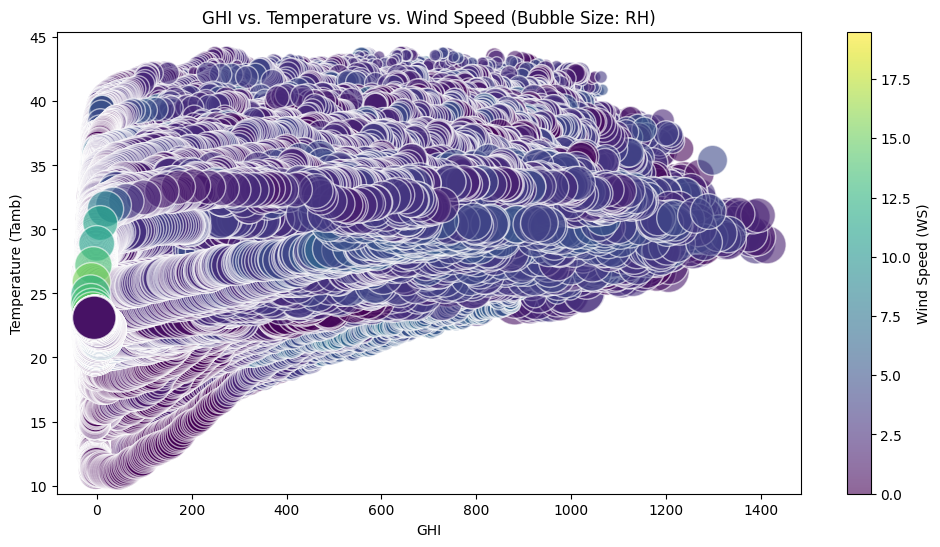

In [21]:
plt.figure(figsize=(12, 6))
bubble = plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, c=df['WS'], cmap='viridis', alpha=0.6, edgecolors='w')
plt.colorbar(bubble, label='Wind Speed (WS)')
plt.xlabel('GHI')
plt.ylabel('Temperature (Tamb)')
plt.title('GHI vs. Temperature vs. Wind Speed (Bubble Size: RH)')
plt.show()


In [24]:
import numpy as np
import pandas as pd

# Drop rows where 'GHI', 'DNI', 'DHI', 'ModA', or 'ModB' have missing values
df = df.dropna(subset=['GHI', 'DNI', 'DHI', 'ModA', 'ModB'])

for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']:
    df.loc[:, col] = df[col].apply(lambda x: np.nan if x < 0 else x)

# Fill NaNs using forward-fill and back-fill
df.ffill(inplace=True)
df.bfill(inplace=True)
